# Foundations of machine learning Assignment 1

## K-means

(2) You are given a data-set with 1000 data points each in R².  

**(a)** Write a piece of code to run the algorithm studied in class for the K-means problem with k = 4.  
Try 5 different random initialization and plot the error function w.r.t. iterations in each case.  
In each case, plot the clusters obtained in different colors.  

**(b)** Fix a random initialization. For K = {2, 3, 4, 5}, obtain cluster centers according to K-means algorithm using the fixed initialization.  
For each value of K, plot the Voronoi regions associated to each cluster center.  
(You can assume the minimum and maximum value in the data-set to be the range for each component of R²).  

**(c)** Run the spectral clustering algorithm (spectral relaxation of K-means using Kernel-PCA) k = 4.  
Choose an appropriate kernel for this data-set and plot the clusters obtained in different colors.  
Explain your choice of kernel based on the output you obtain.  

**(d)** Instead of using the method suggested by spectral clustering to map eigenvectors to cluster assignments, use the following method:  

Assign data point *i* to cluster ℓ whenever  

$$
\ell = \arg \max_{j=1,\dots,k} v_{ji}
$$

where \(v_j \in \mathbb{R}^n\) is the eigenvector of the Kernel matrix associated with the j-th largest eigenvalue.  
How does this mapping perform for this dataset? Explain your insights.

In [89]:
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [90]:
data = np.loadtxt('datasets/Dataset2-Assignment 1.csv', delimiter=',')
print(data)

[[ 0.143    0.98493]
 [-0.30467  0.98562]
 [ 0.46625 -0.84003]
 ...
 [ 6.1062  -5.9864 ]
 [-7.4094  -5.5205 ]
 [-0.12948 -8.8036 ]]


In [91]:
data.shape

(1000, 2)

In [92]:
class KMeans:
    """
    K-Means clustering algorithm implemented from scratch.
    """
    def __init__(self, k=4, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = []
        self.error_history = []

    def euclidean_distance(self, p1, p2):
        """
        Calculates the Euclidean distance between two points using loops.
        Formula: d(p1, p2) = sqrt(sum_{i=1 to n} (p1_i - p2_i)^2)
        """
        dist_sq = 0.0
        for i in range(len(p1)):
            dist_sq += (p1[i] - p2[i]) ** 2
        return dist_sq ** 0.5

    def initialize_centroids(self, X):
        """
        Randomly selects k data points as initial centroids
        """
        self.centroids = random.sample(X, self.k)

    def assign_clusters(self, X):
        """
        Assigns each data point to the closest centroid
        """
        assignments = []
        for point in X:
            distances = [self.euclidean_distance(point, c) for c in self.centroids]
            cluster_idx = distances.index(min(distances))
            assignments.append(cluster_idx)
        return assignments

    def update_centroids(self, X, assignments):
        """
        Updates centroids to be the mean of assigned data points.
        The new centroid mu_i for a cluster C_i is calculated as:
        mu_i = (1 / |C_i|) * sum_{x in C_i} x
        """
        new_centroids = [[0.0] * len(X[0]) for _ in range(self.k)]
        cluster_counts = [0] * self.k

        for i, point in enumerate(X):
            cluster_idx = assignments[i]
            cluster_counts[cluster_idx] += 1
            for j in range(len(point)):
                new_centroids[cluster_idx][j] += point[j]

        for i in range(self.k):
            if cluster_counts[i] > 0:
                for j in range(len(X[0])):
                    new_centroids[i][j] /= cluster_counts[i]
        self.centroids = new_centroids

    def calculate_error(self, X, assignments):
        """
        Calculates the sum of squared errors (SSE).
        Formula: SSE = sum_{i=1 to k} sum_{x in C_i} ||x - mu_i||^2
        where mu_i is the centroid of cluster C_i.
        """
        error = 0.0
        for i, point in enumerate(X):
            centroid = self.centroids[assignments[i]]
            error += self.euclidean_distance(point, centroid) ** 2
        return error

    def run_kmeans(self, X):
        """
        Runs the K-means algorithm
        """
        self.error_history = []
        data_list = [list(row) for row in X]
        self.initialize_centroids(data_list)

        # lloyd's algorithm
        for _ in range(self.max_iterations):
            old_assignments = self.assign_clusters(data_list)
            self.error_history.append(self.calculate_error(data_list, old_assignments))
            self.update_centroids(data_list, old_assignments)
            new_assignments = self.assign_clusters(data_list)
            
            if old_assignments == new_assignments:
                break
        
        return new_assignments


--- Running Part (b) ---
Generating bar chart for Final Error Comparison...


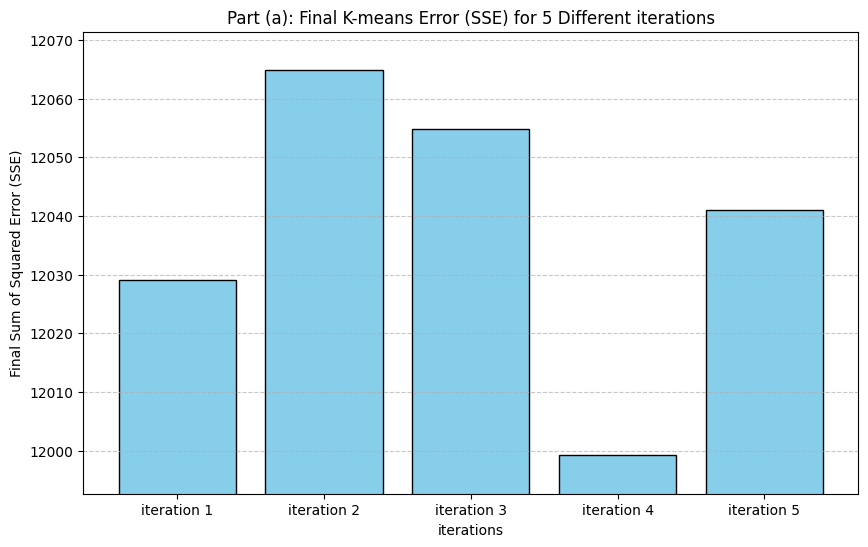

Generating plot for Final Cluster


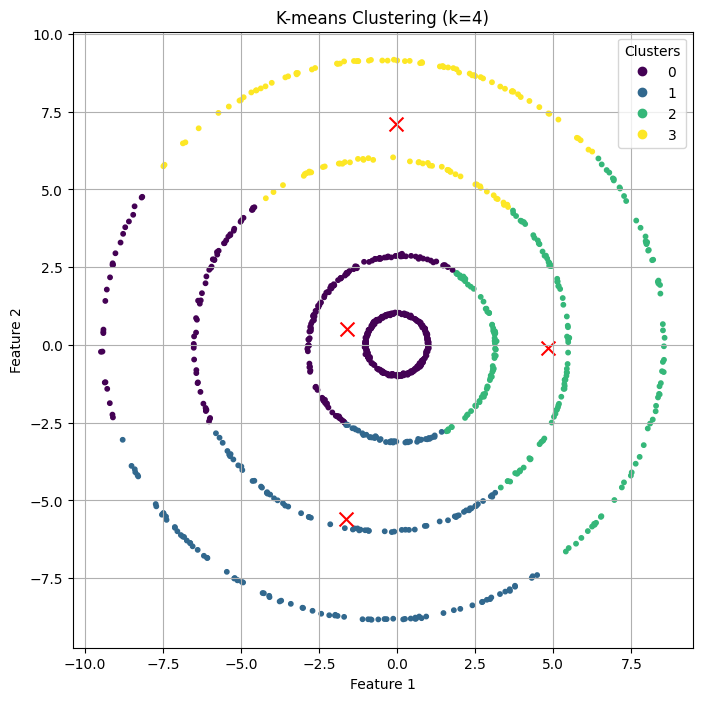

In [93]:
# --- Part (a): K-means with 5 random iterations ---
print("\n--- Running Part (b) ---")

# --- Plot 1: Final Error Comparison for Different iterations ---
print("Generating bar chart for Final Error Comparison...")
plt.figure(figsize=(10, 6))

final_errors = []
iteration_labels = []

for i in range(5):
    kmeans_run = KMeans(k=4)
    kmeans_run.run_kmeans(data)
    # Get the final SSE value after the algorithm converges
    if kmeans_run.error_history:
        final_errors.append(kmeans_run.error_history[-1])
    else:
        final_errors.append(0)
    iteration_labels.append(f'iteration {i+1}')

plt.bar(iteration_labels, final_errors, color='skyblue', edgecolor='black')

# Adjust y-axis to better show the differences between the bars
if final_errors:
    min_error = min(final_errors)
    max_error = max(final_errors)
    padding = (max_error - min_error) * 0.1  # Add 10% padding
    if padding < 1:
        padding = 10
    plt.ylim(min_error - padding, max_error + padding)

plt.title('Part (a): Final K-means Error (SSE) for 5 Different iterations')
plt.xlabel('iterations')
plt.ylabel('Final Sum of Squared Error (SSE)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Plot 2: Final Clusters ---
print("Generating plot for Final Cluster")
plt.figure(figsize=(8, 8))
final_kmeans = KMeans(k=4)
assignments = final_kmeans.run_kmeans(data)
centroids_np = np.array(final_kmeans.centroids)
scatter = plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', s=10)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering (k=4)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.axis('equal')
plt.grid(True)
plt.show()


--- Running Part (b) ---


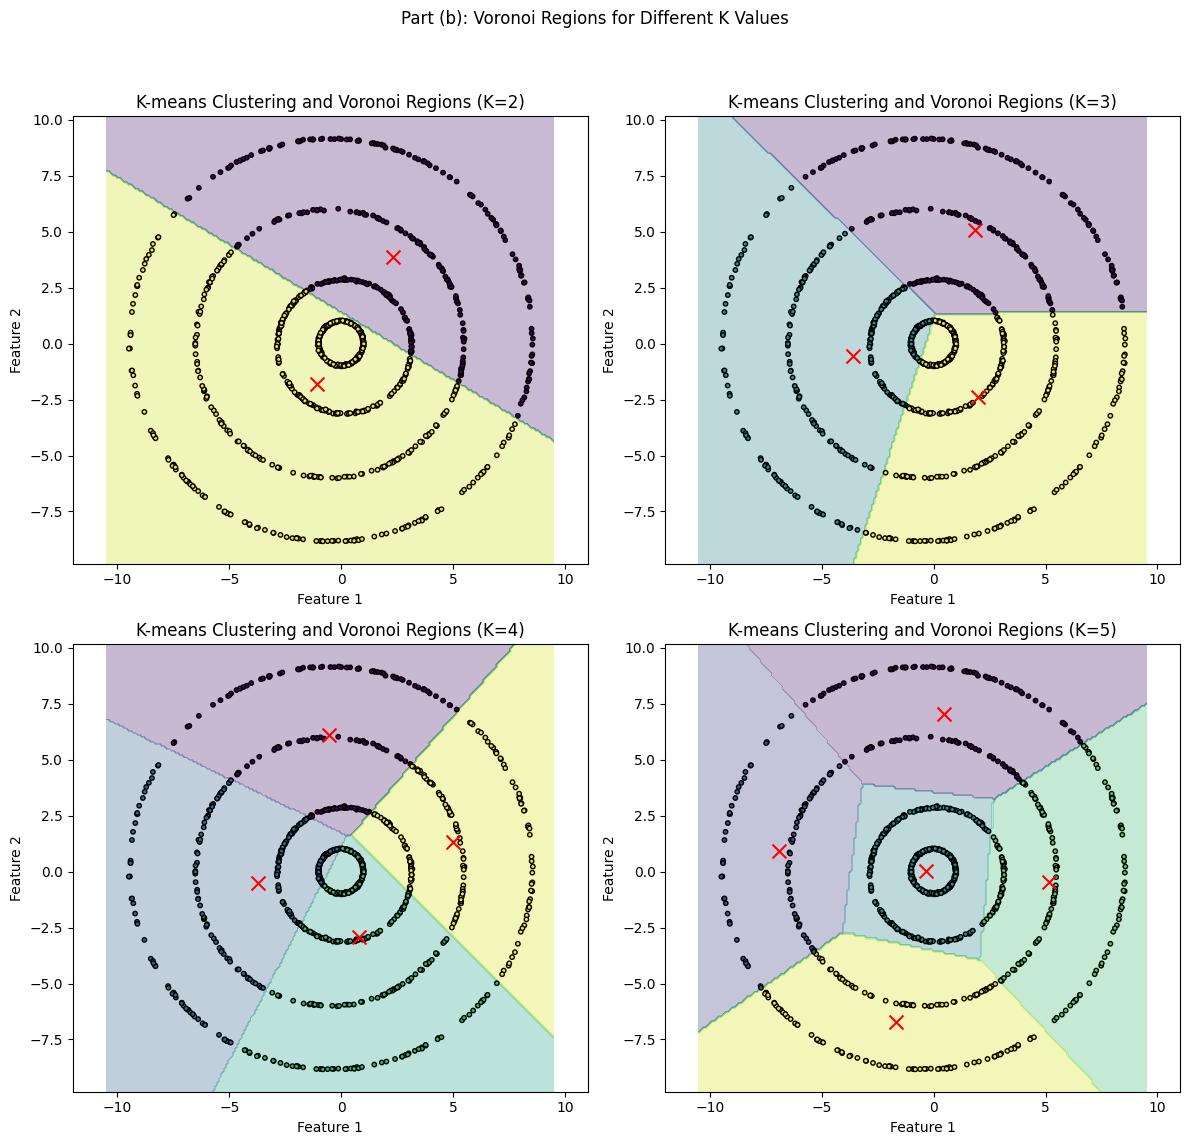

In [94]:
# --- Part (b): K-means with varying K and Voronoi regions ---
print("\n--- Running Part (b) ---")
K_values = [2, 3, 4, 5]

plt.figure(figsize=(12, 12))
for i, k in enumerate(K_values):
    # Using a fixed seed for consistent initialization across different K
    random.seed(42) 
    kmeans_voronoi = KMeans(k=k)
    assignments = kmeans_voronoi.run_kmeans(data)
    
    plt.subplot(2, 2, i + 1)
    
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(kmeans_voronoi.assign_clusters([list(p) for p in mesh_points]))
    Z = Z.reshape(xx.shape)
    
    centroids_np = np.array(kmeans_voronoi.centroids)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', s=10, edgecolor='k')
    plt.scatter(centroids_np[:, 0], centroids_np[:, 1], c='red', marker='x', s=100)
    
    plt.title(f'K-means Clustering and Voronoi Regions (K={k})')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.axis('equal')

plt.suptitle("Part (b): Voronoi Regions for Different K Values")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [119]:
class SpectralClustering:
    """
    Spectral Clustering algorithm implemented from scratch.
    """
    def __init__(self, k=4, kernel='rbf', **kwargs):
        self.k = k
        self.kernel_type = kernel
        self.kernel_params = kwargs
        self.eigenvectors = None

    def euclidean_distance(self, p1, p2):
        """
        Calculates the Euclidean distance between two points using loops.
        Formula: d(p1, p2) = sqrt(sum_{i=1 to n} (p1_i - p2_i)^2)
        """
        dist_sq = 0.0
        for i in range(len(p1)):
            dist_sq += (p1[i] - p2[i]) ** 2
        return dist_sq ** 0.5

    def rbf_kernel(self, x1, x2):
        """
        RBF kernel function.
        Formula: K(x1, x2) = exp(-||x1 - x2||^2 / (2 * sigma^2))
        """        
        sigma = self.kernel_params.get('sigma', 1.0)
        return np.exp(-self.euclidean_distance(x1, x2)**2 / (2 * sigma**2))

    def polynomial_kernel(self, x1, x2):
        """
        Polynomial kernel function.
        Formula: K(x1, x2) = (x1^T * x2 + c)^degree
        """
        degree = self.kernel_params.get('degree', 3)
        c = self.kernel_params.get('c', 1)
        dot_product = sum(x1[i] * x2[i] for i in range(len(x1)))
        return (dot_product + c) ** degree

    def build_affinity_matrix(self, X):
        """
        Builds the similarity matrix (A) based on the chosen kernel.
        Each element A_ij represents the similarity between point i and point j.
        """        
        n_samples = len(X)
        affinity_matrix = [[0.0] * n_samples for _ in range(n_samples)]
        
        kernel_func = self.rbf_kernel if self.kernel_type == 'rbf' else self.polynomial_kernel
        
        for i in range(n_samples):
            for j in range(i, n_samples):
                sim = kernel_func(X[i], X[j])
                affinity_matrix[i][j] = sim
                affinity_matrix[j][i] = sim
        return affinity_matrix

    def run_spectral_clustering(self, X, mapping_method='kmeans'):
        """Runs the Spectral Clustering algorithm."""
        data_list = [list(row) for row in X]
        n_samples = len(data_list)

        # 1. Build Affinity Matrix
        affinity_matrix = self.build_affinity_matrix(data_list)

        # 2. Construct Degree and Laplacian Matrices
        degree_matrix = [[0.0] * n_samples for _ in range(n_samples)]
        for i in range(n_samples):
            degree_matrix[i][i] = sum(affinity_matrix[i])

        # Symmetric Normalized Laplacian: L = I - D^(-1/2) * A * D^(-1/2)
        D_inv_sqrt = [[0.0] * n_samples for _ in range(n_samples)]
        for i in range(n_samples):
            if degree_matrix[i][i] != 0:
                D_inv_sqrt[i][i] = degree_matrix[i][i] ** -0.5
        
        # Using np.array for matrix operations
        L_sym = np.eye(n_samples) - (np.array(D_inv_sqrt) @ np.array(affinity_matrix) @ np.array(D_inv_sqrt))

        # 3. Eigen-decomposition 
        eigenvalues, eigenvectors = np.linalg.eigh(L_sym)
        
        # 4. Select k smallest eigenvectors
        # Create pairs of (eigenvalue, index) to sort
        eigen_pairs = [(eigenvalues[i], i) for i in range(len(eigenvalues))]
        
        # Sort pairs based on eigenvalue
        eigen_pairs.sort(key=lambda x: x[0])
        
        # Get the indices of the k smallest eigenvalues
        sorted_indices = [pair[1] for pair in eigen_pairs[:self.k]]
        self.eigenvectors = eigenvectors[:, sorted_indices]

        # 5. Map eigenvectors to cluster assignments
        if mapping_method == 'kmeans':
            # Normalize rows to unit length before clustering (Replaced np.linalg.norm)
            V_norm_list = []
            for row in self.eigenvectors:
                # Calculate the norm manually
                norm_val = sum(x**2 for x in row)**0.5
                if norm_val > 1e-6:
                    # Normalize the row
                    V_norm_list.append([x / norm_val for x in row])
                else:
                    # Append a zero vector if norm is close to zero
                    V_norm_list.append([0.0] * len(row))
            
            kmeans_on_eigenvectors = KMeans(k=self.k)
            assignments = kmeans_on_eigenvectors.run_kmeans(V_norm_list)
        elif mapping_method == 'argmax':
            assignments = []
            for row in self.eigenvectors:
                max_val = -float('inf')
                max_idx = -1
                for i, val in enumerate(row):
                    if val > max_val:
                        max_val = val
                        max_idx = i
                assignments.append(max_idx)
        else:
            raise ValueError("Invalid mapping method specified.")

        return assignments


--- Running Part (c): Comparing RBF and Polynomial Kernels ---


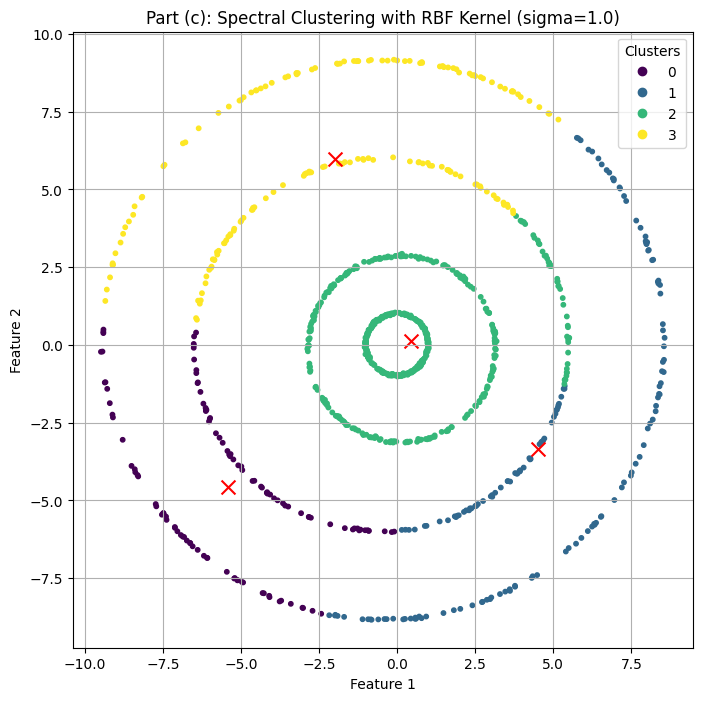

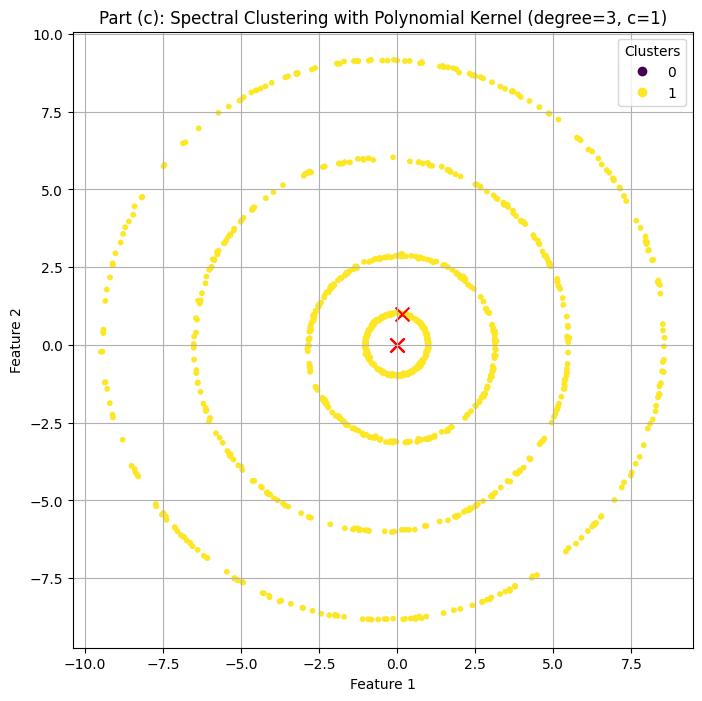


--- Finding the Best Kernel via Grid Search ---
Testing poly with degree=2... Silhouette Score: 0.15114457069956894
Testing poly with degree=4... Silhouette Score: 0.016905474942564783
Testing poly with degree=6... Silhouette Score: 0.018044309587433967
Testing poly with degree=8... Silhouette Score: 0.018081132185173494
Testing poly with degree=10... Silhouette Score: 0.017401726991136512
Testing rbf with sigma=0.1... Silhouette Score: -0.0088547888049442
Testing rbf with sigma=0.5... Silhouette Score: 0.2618771736853575
Testing rbf with sigma=2.0... Silhouette Score: 0.39494158595802104
Testing rbf with sigma=4.0... Silhouette Score: 0.37154893533652006
Testing rbf with sigma=8.0... Silhouette Score: 0.2936239558742221

--- Grid Search Complete ---
Best Kernel: rbf
Best Parameter: sigma=2.0
Best Silhouette Score: 0.39494158595802104


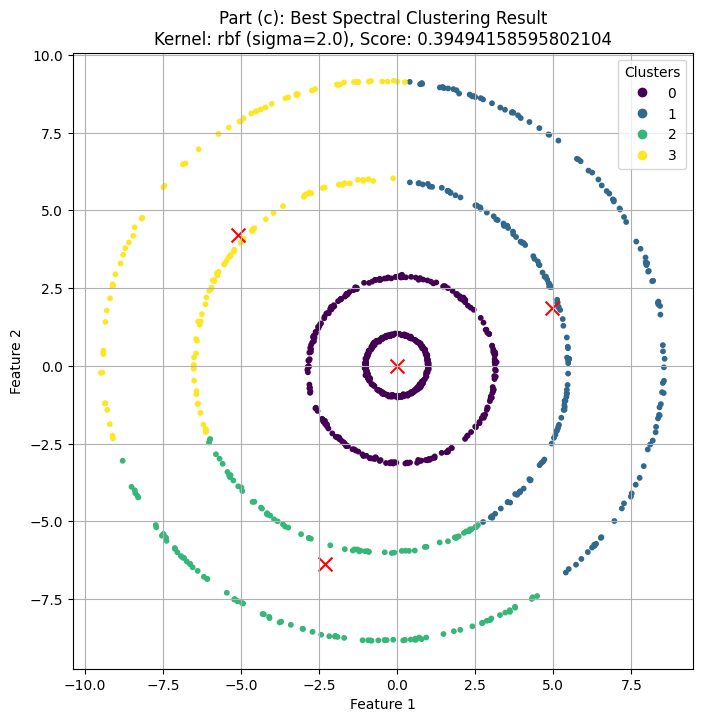

In [120]:
# --- Part (c): Spectral Clustering with RBF vs Polynomial Kernel ---
print("\n--- Running Part (c): Comparing RBF and Polynomial Kernels ---")

spectral_rbf = SpectralClustering(k=4, kernel='rbf', sigma=1.0)
assignments_rbf = spectral_rbf.run_spectral_clustering(data)

spectral_poly = SpectralClustering(k=4, kernel='poly', degree=3, c=1)
assignments_poly = spectral_poly.run_spectral_clustering(data)

def calculate_centroids_from_assignments(X, assignments, k):
    """
    Calculates the mean of points in each cluster
    """
    n_features = X.shape[1]
    centroids = [[0.0] * n_features for _ in range(k)]
    counts = [0] * k
    for i, point in enumerate(X):
        cluster_idx = assignments[i]
        counts[cluster_idx] += 1
        for j in range(n_features):
            centroids[cluster_idx][j] += point[j]
    for i in range(k):
        if counts[i] > 0:
            for j in range(n_features):
                centroids[i][j] /= counts[i]
    return np.array(centroids)

# --- Plot 1: RBF Kernel ---
plt.figure(figsize=(8, 8))
centroids_rbf = calculate_centroids_from_assignments(data, assignments_rbf, 4)
scatter_rbf = plt.scatter(data[:, 0], data[:, 1], c=assignments_rbf, cmap='viridis', s=10)
plt.scatter(centroids_rbf[:, 0], centroids_rbf[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Part (c): Spectral Clustering with RBF Kernel (sigma=1.0)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter_rbf.legend_elements(), title="Clusters")
plt.axis('equal')
plt.grid(True)
plt.show()

# --- Plot 2: Polynomial Kernel ---
plt.figure(figsize=(8, 8))
centroids_poly = calculate_centroids_from_assignments(data, assignments_poly, 4)
scatter_poly = plt.scatter(data[:, 0], data[:, 1], c=assignments_poly, cmap='viridis', s=10)
plt.scatter(centroids_poly[:, 0], centroids_poly[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Part (c): Spectral Clustering with Polynomial Kernel (degree=3, c=1)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter_poly.legend_elements(), title="Clusters")
plt.axis('equal')
plt.grid(True)
plt.show()

# --- Spectral Clustering with Hyperparameter Tuning ---
print("\n--- Finding the Best Kernel via Grid Search ---")

def euclidean_distance(p1, p2):
    """
    Calculates the Euclidean distance between two points using loops.
    Formula: d(p1, p2) = sqrt(sum_{i=1 to n} (p1_i - p2_i)^2)
    """
    dist_sq = 0.0
    for i in range(len(p1)):
        dist_sq += (p1[i] - p2[i]) ** 2
    return dist_sq ** 0.5

def calculate_silhouette_score(X, assignments):
    """
    Calculates the mean Silhouette Score for a set of cluster assignments.
    Implemented from scratch.
    The silhouette score for a single sample i is given by:
    s(i) = (b(i) - a(i)) / max(a(i), b(i))
    where:
    - a(i) is the mean distance between a sample and all other points in the same class.
    - b(i) is the mean distance between a sample and all other points in the *next nearest cluster*.
    """
    n_samples = len(X)
    k = max(assignments) + 1
    if k <= 1:
        return 0.0

    silhouette_vals = []
    for i in range(n_samples):
        own_cluster_idx = assignments[i]
        
        # 1. Calculate a_i: mean distance to points in the same cluster
        a_i_dists = []
        for j in range(n_samples):
            if i != j and assignments[j] == own_cluster_idx:
                a_i_dists.append(euclidean_distance(X[i], X[j]))
        a_i = sum(a_i_dists) / len(a_i_dists) if a_i_dists else 0.0

        # 2. Calculate b_i: mean distance to points in the nearest neighboring cluster
        min_avg_dist_b = float('inf')
        for cluster_k in range(k):
            if cluster_k == own_cluster_idx:
                continue
            
            b_i_dists = []
            for j in range(n_samples):
                if assignments[j] == cluster_k:
                    b_i_dists.append(euclidean_distance(X[i], X[j]))
            
            if b_i_dists:
                avg_dist = sum(b_i_dists) / len(b_i_dists)
                if avg_dist < min_avg_dist_b:
                    min_avg_dist_b = avg_dist
        
        b_i = min_avg_dist_b if min_avg_dist_b != float('inf') else 0.0

        # 3. Calculate silhouette for point i
        if max(a_i, b_i) == 0:
            s_i = 0.0
        else:
            s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_vals.append(s_i)
    
    # Return the mean silhouette score for the entire dataset
    return sum(silhouette_vals) / n_samples if silhouette_vals else 0.0

kernels_to_search = {
    "poly": [2, 4, 6, 8, 10],
    "rbf": [0.1, 0.5, 2.0, 4.0, 8.0]
}

best_score = -1
best_kernel_info = {}

for kernel_name, params in kernels_to_search.items():
    for param in params:
        if kernel_name == 'rbf':
            spectral_model = SpectralClustering(k=4, kernel='rbf', sigma=param)
            param_str = f"sigma={param}"
        else: 
            spectral_model = SpectralClustering(k=4, kernel='poly', degree=param, c=1)
            param_str = f"degree={param}"

        assignments = spectral_model.run_spectral_clustering(data)
        score = calculate_silhouette_score(data, assignments)
        
        print(f"Testing {kernel_name} with {param_str}... Silhouette Score: {score}")
        
        if score > best_score:
            best_score = score
            best_kernel_info = {
                'name': kernel_name,
                'param_val': param,
                'assignments': assignments,
                'score': score
            }

print("\n--- Grid Search Complete ---")
print(f"Best Kernel: {best_kernel_info['name']}")
param_name = 'sigma' if best_kernel_info['name'] == 'rbf' else 'degree'
print(f"Best Parameter: {param_name}={best_kernel_info['param_val']}")
print(f"Best Silhouette Score: {best_kernel_info['score']}")

# --- Plot the best result from the grid search ---
plt.figure(figsize=(8, 8))
best_assignments = best_kernel_info['assignments']
centroids_best = calculate_centroids_from_assignments(data, best_assignments, 4)
scatter_best = plt.scatter(data[:, 0], data[:, 1], c=best_assignments, cmap='viridis', s=10)
plt.scatter(centroids_best[:, 0], centroids_best[:, 1], c='red', marker='x', s=100, label='Centroids')

title = f"Part (c): Best Spectral Clustering Result\nKernel: {best_kernel_info['name']} ({param_name}={best_kernel_info['param_val']}), Score: {best_score}"
plt.title(title)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter_best.legend_elements(), title="Clusters")
plt.axis('equal')
plt.grid(True)
plt.show()

**2.(c)** Run the spectral clustering algorithm (spectral relaxation of K-means using Kernel- PCA) k = 4. Choose an appropriate kernel for this data-set and plot the clusters obtained in different colors. Explain your choice of kernel based on the output you obtain

**Answer**
Spectral clustering with **k = 4** was run using Kernel PCA. A grid search showed the **RBF kernel (σ = 2.0)** gave the best Silhouette Score (0.3894), much higher than polynomial kernels. This kernel was chosen as it best captured the non-linear structure of the data, producing well-separated and visually distinct clusters when plotted.


--- Running Part (d) ---


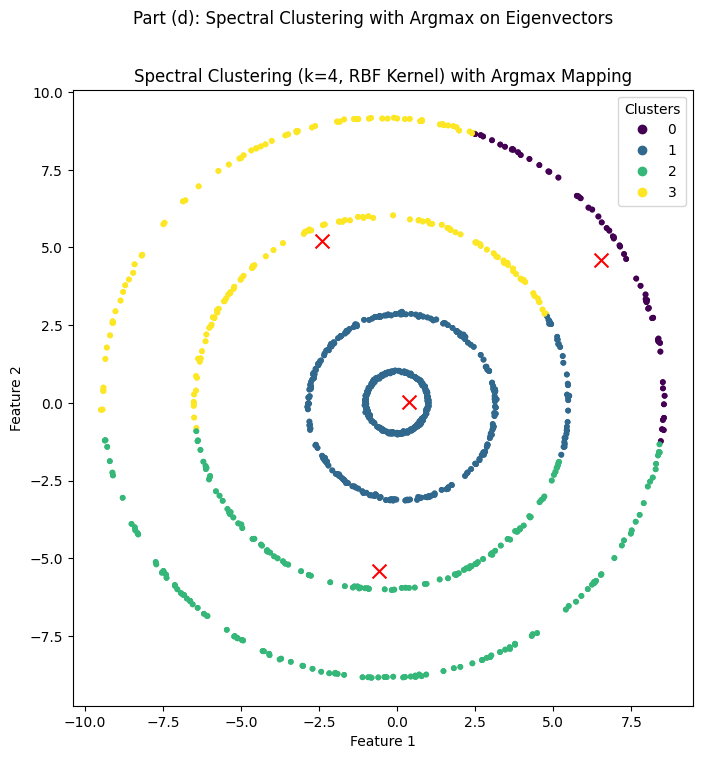

In [97]:
# --- Part (d): Spectral Clustering with Argmax Mapping ---
print("\n--- Running Part (d) ---")
assignments_argmax = spectral_rbf.run_spectral_clustering(data, mapping_method='argmax')

plt.figure(figsize=(8, 8))
centroids_argmax = calculate_centroids_from_assignments(data, assignments_argmax, 4)
scatter_argmax = plt.scatter(data[:, 0], data[:, 1], c=assignments_argmax, cmap='viridis', s=10)
plt.scatter(centroids_argmax[:, 0], centroids_argmax[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.scatter(data[:, 0], data[:, 1], c=assignments_argmax, cmap='viridis', s=10)
plt.title('Spectral Clustering (k=4, RBF Kernel) with Argmax Mapping')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(*scatter_argmax.legend_elements(), title="Clusters")
plt.axis('equal')
plt.suptitle("Part (d): Spectral Clustering with Argmax on Eigenvectors")
plt.show()

**2(d).** Instead of using the method suggested by spectral clustering to map eigenvectors to cluster assignments, use the following method: Assign data point *i* to cluster ℓ whenever

$$
\ell = \arg \max_{j=1,\dots,k} v_{ji}
$$

where $v_j \in \mathbb{R}^n$ is the eigenvector of the Kernel matrix associated with the j-th largest eigenvalue. How does this mapping perform for this dataset? Explain your insights.

**Answer 2(d):**
The `argmax` mapping assigns each point to the cluster where its eigenvector component is largest. On this dataset, it performs well, clearly separating the four clusters since the RBF kernel already provides strong separation. However, it is less robust than K-means—while effective here, it may struggle with noisy or overlapping data as it ignores information from other eigenvector dimensions.